In [1]:
#Importa Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Dataset
df_covid = pd.read_csv('http://tiagodemelo.info/datasets/dados-curso-completo.csv.tar.gz', compression='gzip')
df_covid

dados-curso-completo.csv  ...                  hashtags
0            2020-03-23 18:51:14  ...                        []
1            2020-03-18 03:18:14  ...                        []
2            2020-03-29 12:09:27  ...                        []
3            2020-04-01 21:11:07  ...                        []
4            2020-03-19 17:49:40  ...                        []
...                          ...  ...                       ...
1658821      2020-05-12 13:02:34  ...                        []
1658822      2020-03-19 18:16:30  ...           ['CORONAVIRUS']
1658823      2020-04-07 18:14:45  ...  ['BolsonaroTemRazaoSim']
1658824      2020-06-02 16:04:51  ...                        []
1658825                      NaN  ...                       NaN

[1658826 rows x 13 columns]

#Visão Geral dos Dados

##Sem processamento

###Relatório

In [3]:
#Instalando o pandas profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0-py2.py3-none-any.whl size=258952 sha256=89edeafa05d20061d39a3f410de0d601a59dac086406c3aa11bef797541307eb
  Stored in directory: /tmp/pip-ephem-wheel-cache-n7dppxa9/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [4]:
#Importando o ProfileReport
from pandas_profiling import ProfileReport

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
#Executando o profile

#Desabilita os métodos considerados mais custosos
#profile = ProfileReport(df_covid, title = 'Relatório - Pandas Profiling', html = {'style': {'full_width': True}}, minimal = True)

profile = ProfileReport(df_covid, title='Relatório - Pandas Profiling', html={'style': {'full_width': True}}, plot={'histogram': {'bins': 10}})
profile

Output hidden; open in https://colab.research.google.com to view.

In [6]:
#Fazendo download do relatório (disponível na aba à esquerda, ícone pasta)
profile.to_file(output_file = "dataframe_report.html")

In [7]:
#Visualização mais enxuta do relatório
profile.to_widgets()

/usr/local/lib/python3.6/dist-packages/pandas_profiling/profile_report.py:397: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


###Análises

O dataset:

*   Número de Variáveis - 13;
  *   9 Categóricas;
  *   4 Numéricas.
*   Número de Observações - 1658826.

De acordo com o relatório acima, **37.3%** do dataset correspondem à **dados faltantes**. As variáveis que possuem mais dados faltantes são:

*   Latitude - 99.5%;
*   Longitude - 99.5%
*   Lugar - 95.5%;
*   País - 95.5%;
*   Sigla - 95.5%.

Dois dos usuários que mais possuem comentários no dataset são canais de notícia de Portugal, inclusive uma delas aparece duas vezes por terem nome de usuários diferentes.

*   Agência Lusa - 1404;
*   tvi24 Últimas (1181) e tvi24 (1178) - 2359.

A coluna retweet tem valores que variam de 0 (1314424	ou 79.2%) a 1139763 (1 ou < 0.1%), fazendo com que os dados tenham uma assimetria positiva ou à direita, ou seja, maior que 0 (75.73862462). Esse comportamento pode ser melhor observado no gráfico abaixo.















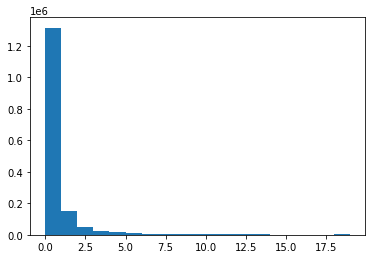

In [8]:
plt.hist(df_covid['retweet'], bins=range(0, 20));

Os dados da coluna seguidores apresentam o mesmo comportamento descrito anteriormente. O usuário com o maior número de seguidores é o Donald Trump.

In [9]:
df_covid.loc[df_covid.seguidores == 84241250]

dados-curso-completo.csv          usuario  ... longitude hashtags
788393      2020-05-23 23:08:17  Donald J. Trump  ...       NaN       []

[1 rows x 13 columns]

A maioria dos textos estão no idioma português (95.7%), porém o relatório mostra que apenas 4.3% dos tweets são do Brasil e de Portugal. Outros países que tem como um de seus idiomas o português, correspondem a menos de 1% do dataset. Esse desencontro entre as informações se deve provavelmente aos dados faltantes na coluna País.

In [10]:
df_covid.iloc[:,3]

0          @BolsonaroSP Cade o fundão deputado??? Congres...
1          Em ação preventiva, o Governo do Estado suspen...
2          Incrível como os defensores do fim do distanci...
3          Fumaça de cigarro pode propagar coronavírus? h...
4          🚨Todos juntos contra COVID-19💪\n\nSolicite seu...
                                 ...                        
1658821    @OsmarTerra Sr. Osmar Terra, gostaria de ouvir...
1658822    CIENTISTA DE HARVARD PREVÊ QUE ATÉ 70% DO MUND...
1658823    #BolsonaroTemRazaoSim porque, quando a prefeit...
1658824    Em meio a uma pandemia, estamos na luta também...
1658825                                                  NaN
Name: texto, Length: 1658826, dtype: object

In [11]:
#Conta quantidade de um caracter expecífico na linha 1 da coluna texto
#Faz distinção entre letra maiúscula e minúscula
df_covid.iloc[:,3][0].count("?")

3

In [12]:
#acessa primeira linha da coluna 3(texto)
df_covid.iloc[:,3][0]

'@BolsonaroSP Cade o fundão deputado??? Congresso está sentado em 3BI olhando a pandemia da janela.'

In [13]:
#conta quantidade de caracteres da linha 1 da coluna 3(texto)
len(df_covid.iloc[:,3][0])

98

In [14]:
#Quantidade de um caracter expecífico da linha 0 a 5 na coluna texto
nome_array1 = [] #cria vetor
for x in df_covid.iloc[0:5,3]: #anda da linha 0 à 5
  s = x.count("?") #conta quantas interrogações tem na linha
  nome_array1.append(s) #add quantidade na array

In [15]:
#array resultante
nome_array1

[3, 0, 0, 1, 0]

In [16]:
#Cria dataframe a partir da array 
df_teste1 = pd.concat([pd.DataFrame([i], columns=['quantidade de interrogacoes por linha']) for i in nome_array1], ignore_index=True)
df_teste1.set_index(df_covid.iloc[0:5,1], inplace=True) #coloquei no dataframe a coluna usuario como index apenas para melhor visualização
df_teste1

quantidade de interrogacoes por linha
usuario                                                   
Gaboardi                                                 3
Seu Zé da Farmácia                                       0
Marília Oliveira 🇧🇷                                      0
🚩                                                        1
Nova Impressão                                           0

In [17]:
#Resultado final: o texto de Gaboardi tem 3 interrogações, a do Seu Zé da Farmácia nenhuma e etc
#Lembrar que os usuários se repetem então a próxima frase do Gaboardi pode ter nenhuma interrogação

In [18]:
#Quantidade de caracteres da linha 0 a 5 da coluna texto
nome_array2 = [] #cria vetor
for x in df_covid.iloc[0:5,3]:
  s = len(x)
  nome_array2.append(s)

In [19]:
#array resultante
nome_array2

[98, 140, 140, 68, 140]

In [20]:
#Cria dataframe a partir da array 
df_teste2 = pd.concat([pd.DataFrame([i], columns=['quantidade de caracteres por linha']) for i in nome_array2], ignore_index=True)
df_teste2.set_index(df_covid.iloc[0:5,1], inplace=True) #coloquei no dataframe a coluna usuario como index apenas para melhor visualização
df_teste2

quantidade de caracteres por linha
usuario                                                
Gaboardi                                             98
Seu Zé da Farmácia                                  140
Marília Oliveira 🇧🇷                                 140
🚩                                                    68
Nova Impressão                                      140

In [23]:
#Resultado final: o texto de Gaboardi tem 98 caracteres, a do Seu Zé da Farmácia 140 e etc
#Lembrar que os usuários se repetem então a próxima frase do Gaboardi pode ter mais, menos ou a mesma quantidade de caracteres que a anterior

In [21]:
df_covid['texto']

0          @BolsonaroSP Cade o fundão deputado??? Congres...
1          Em ação preventiva, o Governo do Estado suspen...
2          Incrível como os defensores do fim do distanci...
3          Fumaça de cigarro pode propagar coronavírus? h...
4          🚨Todos juntos contra COVID-19💪\n\nSolicite seu...
                                 ...                        
1658821    @OsmarTerra Sr. Osmar Terra, gostaria de ouvir...
1658822    CIENTISTA DE HARVARD PREVÊ QUE ATÉ 70% DO MUND...
1658823    #BolsonaroTemRazaoSim porque, quando a prefeit...
1658824    Em meio a uma pandemia, estamos na luta também...
1658825                                                  NaN
Name: texto, Length: 1658826, dtype: object

##Com processamento

#Temas Discutidos

#Visão Temporal

#Visão Geográfica